In [339]:
import os
import matplotlib
import numpy as np
import pandas as pd
from scipy.interpolate import make_interp_spline 
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams['axes.unicode_minus']=False # 用来正常显示负号
font_path = "/Users/ys/Library/Fonts/Cambria.ttf"
font = matplotlib.font_manager.FontProperties(fname=font_path)


#! 根据模型修改
# ppi, ppi-woppm, rnn, rnn-woppm
model_name = "ppi"

In [340]:
results_dir = f"./results/{model_name}"
values = defaultdict(list)
errors = defaultdict(list)
mins = defaultdict(list)
maxs = defaultdict(list)
layers_num = len(os.listdir(results_dir))
for fn in ['emb'] + list(range(layers_num-1)):
    lines = open(os.path.join(results_dir, str(fn)+".eval"), "r").readlines()
    for line in lines:
        orga, avg, stdev, _min, _max = line.strip().split()
        values[orga].append(float(avg))
        errors[orga].append(float(stdev))
        mins[orga].append(float(_min))
        maxs[orga].append(float(_max))


In [341]:
# xcords = [xs[i] for i in range(0, len(xs), 3)]
# xticks = [xticks[i] for i in range(0, len(xs), 3)]

# fig, subs = plt.subplots(2, 3, figsize=(9, 5))
# for idx, orga in enumerate(species):
#     row = idx // 3
#     col = idx % 3
#     subs[row, col].set_xlim(0.5, xlim, 1)
#     if row == 1:
#         # subs[row, col].set_xlabel("layer")
#         subs[row, col].set_xticks(xcords, xticks, fontproperties=font, size=14)
#     else:
#         subs[row, col].xaxis.set_visible(False)

#     subs[row, col].set_ylim(0, 1.0)
#     if col == 0:
#         subs[row, col].set_yticks([0, 0.25, 0.5, 0.75, 1.0], [0, 0.25, 0.5, 0.75, 1.0], fontproperties=font, size=14)
#     else:
#         subs[row, col].yaxis.set_visible(False)
#     subs[row, col].set_title(titles[idx], fontproperties=font, size=14, y=0)

#     f1 = np.array(values[orga])
#     error = np.array(errors[orga])
#     _min = np.array(mins[orga])
#     _max = np.array(maxs[orga])

#     subs[row, col].fill_between(xs, mins[orga], maxs[orga], color=colors[idx], alpha=0.7)
#     subs[row, col].plot(xs, f1, lw=0.5)
#     # subs[row, col].scatter(xs, f1, s=error*800, color=colors[idx], alpha=0.7)


# plt.savefig(f"./organism-{model_name}.pdf", bbox_inches='tight')

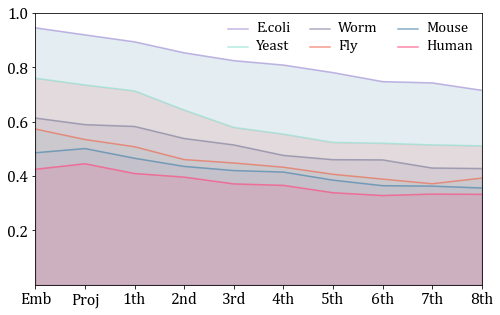

In [342]:
plt.close()
# fig, subs = plt.subplots(1, 2, figsize=(10, 5))
plt.figure(figsize=(8, 5))
fig = plt.subplot()

xcords = np.arange(1, len(xs)+1)
xlim = layers_num
fig.set_xlim(1, xlim, 1)
fig.set_ylim(0, 1)
fig.set_xticks(xcords, xticks, fontproperties=font, size=16)
fig.set_yticks([0.2, 0.4, 0.6, 0.8, 1.0],[0.2, 0.4, 0.6, 0.8, 1.0], fontproperties=font, size=16)

alphas = [0.2, 0.25, 0.3, 0.35, 0.4, 0.45] 
f1s = [np.array(values[species[idx]])for idx in idxs]

for idx in idxs:
    orga = species[idx]
    f1 = f1s[idx]
    error = np.array(errors[orga])

    # fig.errorbar(xs, values[orga], yerr=errors[orga], label=titles[idx], capsize=3, marker="o", ms=4)
    fig.fill_between(xs, 0, f1, alpha=0.15, color=colors[idx])
    
for idx in idxs:
    orga = species[idx]
    f1 = np.array(values[orga])
    fig.plot(xs, f1, color=colors[idx], alpha=0.7, label=titles[idx])
    

legends = fig.legend(frameon=False, ncol=3).get_texts()
for leg in legends:
    leg.set_fontproperties(font)
    leg.set_size(15)
    
plt.savefig(f"./orga-{model_name}.pdf", bbox_inches='tight')